## 谱聚类(Spectral Clustering)

- 聚类问题可以分为两种思路：
    1.  Compactness，这类有 K-means，GMM 等，但是这类算法只能处理凸集，为了处理非凸的样本集，必须引入核技巧。
    2.  Connectivity，这类以谱聚类为代表。

#### 相似度表达

- 谱聚类是一种基于无向带权图的聚类方法。
- 图用 $G=(V,E)$ 表示
    - 点 $V=\{1,2,\cdots,N\}$
    - 边 $E=\{w_{ij}\}$
    - $w_{ij}$ 是边的权重，权重为相似度，$W=(w_{ij})$ 是相似度矩阵
- 定义相似度（径向核）：
$$\begin{align}
w_{ij}&=k(x_i,x_j)\\
&=\exp(-\frac{||x_i-x_j||_2^2}{2\sigma^2}),(i,j)\in E\\
&=0,(i,j)\notin E
\end{align}$$

- 定义图的分割，分割相当于聚类的结果 $w(A,B)$：
$$A\sub V,B\sub V,A\cap B=\emptyset,w(A,B)=\sum\limits_{i\in A,j\in B}w_{ij}$$
- 假设共有 $K$ 个类别，对这个图的分割 
$$\begin{align}
CUT(V)&=CUT(A_1,A_2,\cdots,A_K)\\
&=\sum\limits_{k=1}^Kw(A_k,\overline{A_k})\\
&=\sum\limits_{k=1}^K[w(A_k,V)-w(A_k,A_k)]
\end{align}$$

- 目标就是 $\min\limits_{A_k}CUT(V)$。

- 为了平衡每一类内部的权重不同，需要归一化的操作，定义每个集合的度
    - 单个节点：$d_i=\sum\limits_{j=1}^Nw_{ij}$
    - 每个集合：$\Delta_k=degree(A_k)=\sum\limits_{i\in A_k}d_i$
- 于是有：
$$N(CUT)=\sum\limits_{k=1}^K\frac{w(A_k,\overline{A_k})}{\sum\limits_{i\in A_k}d_i}$$
- 目标函数求最小化
$$\{\hat{A}_k\}_{k=1}^K=\mathop{argmin}_{A_k}N(CUT)$$

#### 矩阵表达
- 引入指示向量：
$$
\left\{
\begin{align}y_i\in \{0,1\}^K\\
\sum\limits_{j=1}^Ky_{ij}=1\end{align}
\right.
$$
- 其中，$y_{ij}$ 表示第 $i$ 个样本属于 $j$ 个类别
- 记为$Y=(y_1,y_2,\cdots,y_N)^T$
- 所以：
$$\hat{Y}=\mathop{argmin}_YN(CUT)$$
- 将 $N(CUT)$ 写成对角矩阵的形式于是有：
$$
\begin{align}N(CUT)&=Trace[diag(\frac{w(A_1,\overline{A_1})}{\sum\limits_{i\in A_1}d_i},\frac{w(A_2,\overline{A_2})}{\sum\limits_{i\in A_2}d_i},\cdots,\frac{w(A_K,\overline{A_K})}{\sum\limits_{i\in A_K}d_i})]\nonumber\\
&=Trace[diag(w(A_1,\overline{A_1}),w(A_2,\overline{A_2}),\cdots,w(A_K,\overline{A_K}))\cdot diag(\sum\limits_{i\in A_1}d_i,\cdots,\sum\limits_{i\in A_K}d_i)^{-1}]\nonumber\\
&=Trace[O\cdot P^{-1}]
\end{align}
$$

#### 计算

- 已知 $Y,w$ 两个矩阵，求 $O,P$。

##### 求P
- 由于：$$Y^TY=\sum\limits_{i=1}^Ny_iy_i^T$$

- 对于 $y_iy_i^T$，只在对角线上的 $k\times k$ 处为 1
- 所以有：
$$Y^TY=diag(N_1,N_2,\cdots,N_K)$$

- 其中$N_i$ 表示有 $N_i$ 个样本属于 $i$，即 $N_k=\sum\limits_{k\in A_k}1$

- 引入对角矩阵，根据 $d_i$ 的定义， $D=diag(d_1,d_2,\cdots,d_N)=diag(w_{NN}\mathbb{I}_{N1})$
- 于是：$P=Y^TDY$




##### 求O
- 表达为：
$$
\begin{align}
O&=diag(w(A_1,\overline{A_1}),w(A_2,\overline{A_2}),\cdots,w(A_K,\overline{A_K})\\
&=diag(w(A_i,V))-diag(w(A_i,A_i))\\
&=diag(\sum\limits_{j\in A_i}d_j)-diag(w(A_i,A_i))
\end{align}
$$
- 第一项由上已知，第二项可以写成 $Y^TwY$
- 由于：
$$Y^TwY=\sum\limits_{i=1}^N\sum\limits_{j=1}^Ny_iy_j^Tw_{ij}$$
- 矩阵的第 $lm$ 项可以写为：
$$\sum\limits_{i\in A_l,j\in A_m}w_{ij}$$

- 这个矩阵的对角线上的项和 $w(A_i,A_i)$ 相同，所以取迹后的取值不会变化。

所以：
$$N(CUT)=Trace[(Y^T(D-w))Y)\cdot(Y^TDY)^{-1}]$$
> 其中，$ L=D-w$ 叫做拉普拉斯矩阵。

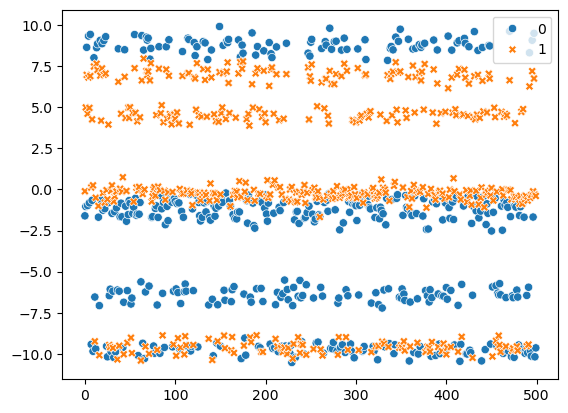

In [23]:
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=[0.4, 0.3, 0.4, 0.3, 0.4], random_state=11)

sns.scatterplot(data=X)
plt.show()

In [24]:
from sklearn.cluster import SpectralClustering

y_pred = SpectralClustering().fit_predict(X)
from sklearn import metrics
print ("Calinski-Harabasz Score", metrics.calinski_harabasz_score(X, y_pred)) 

Calinski-Harabasz Score 25966.18960486198


In [25]:
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((3,4,5,6)):
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
        print ("Calinski-Harabasz Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabasz_score(X, y_pred)) 

Calinski-Harabasz Score with gamma= 0.01 n_clusters= 3 score: 1104.1793404764726
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 4 score: 4352.713434887645
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 5 score: 33776.800117664105
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 6 score: 29321.545029802437
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 3 score: 1104.1793404764726
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 4 score: 4352.713434887645
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 5 score: 33776.800117664105
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 6 score: 29807.418667828784
Calinski-Harabasz Score with gamma= 1 n_clusters= 3 score: 688.646653697041
Calinski-Harabasz Score with gamma= 1 n_clusters= 4 score: 4352.713434887645
Calinski-Harabasz Score with gamma= 1 n_clusters= 5 score: 33776.800117664105
Calinski-Harabasz Score with gamma= 1 n_clusters= 6 score: 29818.324011507084
Calinski-Harabasz Score with gamma= 10 n_clusters

In [10]:
y_pred = SpectralClustering(gamma=0.1).fit_predict(X)
print ("Calinski-Harabasz Score", metrics.calinski_harabasz_score(X, y_pred))

Calinski-Harabasz Score 14948.519767429716
